# 머신러닝 회귀모델 실습

- Kaggle data : https://www.kaggle.com/mustafaali96/weight-height
- 데이터 컬럼 : Gender, Height, Weight
- 목표(target) : 사람의 키에 따른 몸무게 예측하기
- 학습기(Estimator) : LinearRegression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 데이터 로딩 및 단위 변경

In [5]:
# read weight-geight dataset
data = "data/weight-height.csv"
wh_df = pd.read_csv(data)

In [6]:
wh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### [문제해결] 컬럼 단위를 우리에게 익숙한 값으로 변경하기
- 키 : inch -> cm, 1inch = 2.54cm
- 몸무게 : lb(파운트) -> kg, 1lb = 0.4563kg

In [10]:
# read weight-height dataset
data = "data/weight-height.csv"
wh_df = pd.read_csv(data)

# 키 변경하기
wh_df["Height"] = wh_df["Height"].apply(lambda x:x*2.54)

# 몸무게 변경하기
wh_df["Weight"] = wh_df["Weight"].apply(lambda x:x *0.4563)

wh_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


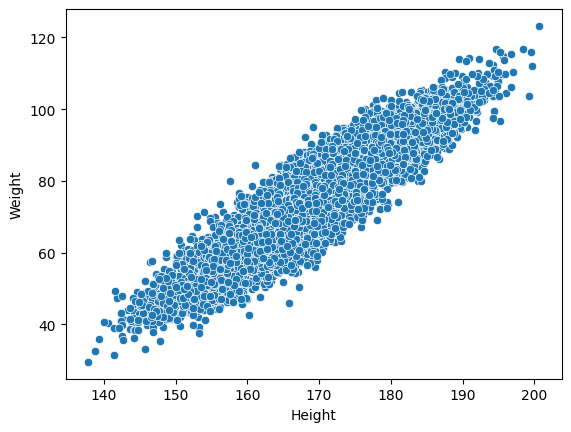

In [11]:
# 키와 몸무게 분포 확인
sns.scatterplot(data=wh_df, x = 'Height', y = 'Weight')
plt.show()

# 1. 키에 따른 몸무게 예측
### 학습, 테스트 데이터 준비
- Feature(x)와 label(y) 데이터 분리

In [12]:
x = wh_df["Height"] # 입력데이터
y = wh_df["Weight"] # 정답데이터

### [문제해결] 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나누기
- random_seed 값 주기
- stratify=y 설정은
    - target이 classification인 경우
    - feature가 2개이상 있을 때 사용

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42, stratify=y)

In [20]:
x_train.shape
print(x[:5])

0    187.571423
1    174.706036
2    188.239668
3    182.196685
4    177.499761
Name: Height, dtype: float64


In [17]:
model_lr = LinearRegression()
# model_lr.fit(x_train, y_train)
print(0)

0


In [18]:
# 모델 학습
# model_lr.fit(x_train, y_train)  <-- x_train은 2D 여야함.
model_lr.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

#### [tip] feature가 1개인 경우, 학습 및 테스트시 reshape(-1,1)로 차원을 바꿔 주는 이유
- 학습기는 기본적으로 feature 2개 이상의 input이 들어간다고 가정하고 만들어뒀다.(2차원 array)
- 현재 키(height)만 있음.(1차원 vector)

## 학습 모델 테스트

In [21]:
#print(type(x_test))
print("테스트 데이터", x_test.values)
print()
print(x_test.values.reshape(-1,1))

테스트 데이터 [169.19836426 158.83192334 181.88199793 ... 161.13891013 168.45300473
 175.00828462]

[[169.19836426]
 [158.83192334]
 [181.88199793]
 ...
 [161.13891013]
 [168.45300473]
 [175.00828462]]


In [22]:
# 테스트 데이터에 대한 예측을 수행
y_pred = model_lr.predict(x_test.values.reshape(-1,1))

In [23]:
y_pred

array([74.56467935, 60.20010312, 92.14014465, ..., 63.39685   ,
       73.5318491 , 82.61537337])

### 모델 성능 평가하기
 - MSE(Mean Squared Error)를 측정하기
 - RMSE(Root Mean Squared Error)를 측정하기

In [24]:
# MSE(Mean Squared Error)
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

MSE : 30.446159278518884
RMSE : 5.517803845600067


In [26]:
model_lr.predict([[165]])

array([68.74708738])

In [28]:
y_pred2 = model_lr.predict(np.array([177,185]).reshape(-1,1))
y_pred2

array([85.37525476, 96.46069968])

In [59]:
my_family_heights = np.array([[175], [180]])  # 나와 가족의 키
predicted_weights = model_lr.predict(my_family_heights)
print(predicted_weights)

[82.60389353 89.53229661]


In [34]:
my_family_heights = pd.Series([165,180])
pred_wei = model_lr.predict(my_family_heights.values.reshape(-1,1))
print(pred_wei)

[68.74708738 89.53229661]


### 예측 결과 시각화


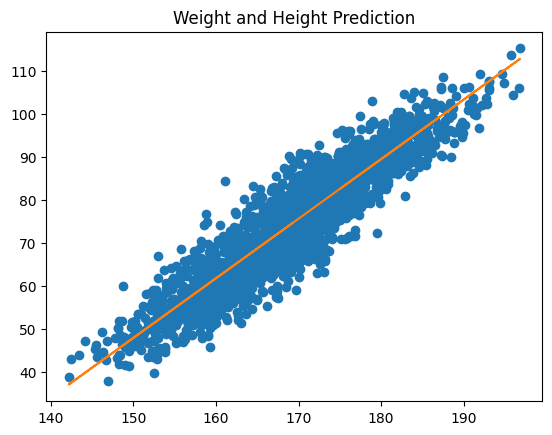

In [35]:
plt.plot(x_test, y_test, 'o')
plt.plot(x_test, y_pred)
plt.title('Weight and Height Prediction')
plt.show()

# 키와 성별에 따른 몸무게 예측하기

- feature 갯수 2개로 학습하기
- Gender, height 데이터로 linear regression 모델 만들기
- Gender는 범주형 데이터임 : One Hot Encoding으로 변환하기

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
# read weight-height dataset
data = "data/weight-height.csv"
gwh_df = pd.read_csv(data)
gwh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [39]:
# 인치, 파운드 -> cm, kg으로 변환
gwh_df["Height"] = gwh_df["Height"] * 2.54
gwh_df["Weight"] = gwh_df["Weight"] * 0.4563
# read weight-height dataset
gwh_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


<Figure size 1000x600 with 0 Axes>

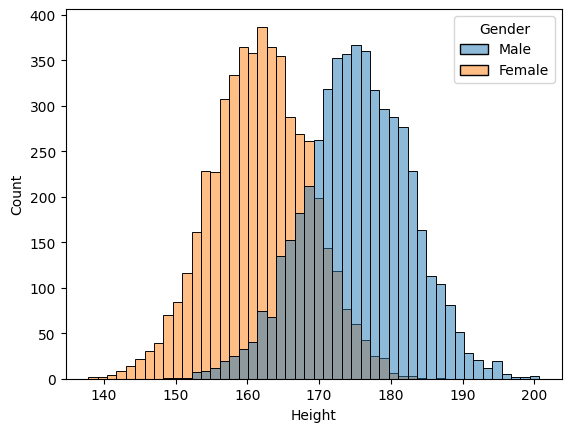

<Figure size 1000x600 with 0 Axes>

In [40]:
# feature distribution
sns.histplot(data=gwh_df, x="Height", hue="Gender")
plt.figure(figsize=(10,6))

## ML을 위한 feature Engineering

- 범주형 데이터 숫자로 변환 : One Hot Encoding

In [41]:
# Gender 컬럼을 one hot encoding으로 변환하기
df_OHE = pd.get_dummies(gwh_df, columns=['Gender'])
df_OHE

,Height,Weight,Gender_Female,Gender_Male
0,187.571423,110.376033,False,True
1,174.706036,74.062269,False,True
2,188.239668,97.073652,False,True
3,182.196685,100.405379,False,True
4,177.499761,94.157414,False,True
...,...,...,...,...
9995,168.078536,62.411552,True,False
9996,170.350573,77.967025,True,False
9997,162.224700,58.623288,True,False
9998,175.346978,74.765878,True,False


In [42]:
# X = Gender, Height
X = df_OHE.drop(columns='Weight')

# y = Weight
y = df_OHE['Weight']

In [43]:
# train data / test 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# 학습모델 객체생성, 학습, 테스트
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model_lr2.predict(X_test)
X_test.columns

Index(['Height', 'Gender_Female', 'Gender_Male'], dtype='object')

In [50]:
# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 21.08003941812068
RMSE : 4.591300405998357


In [55]:
my_test = pd.DataFrame({
    'Height': [165, 176],
    'Gender_Female': [1, 0],
    'Gender_Male': [0, 1]
})
my_test

,Height,Gender_Female,Gender_Male
0,165,1,0
1,176,0,1


In [56]:
model_lr2.predict(my_test)

array([65.39940251, 86.03106994])

In [57]:
X_test[:5]

,Height,Gender_Female,Gender_Male
6252,174.465570,True,False
4684,174.826508,False,True
1731,168.651246,False,True
4742,182.700524,False,True
4521,170.288974,False,True


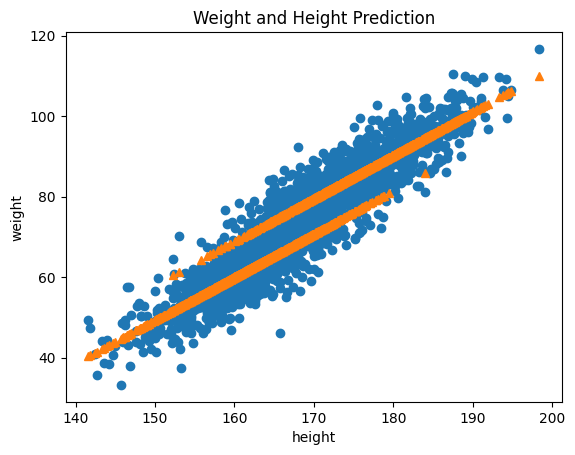

In [58]:
# 테스트 데이터(X)에 따른 실제 몸무게(y)와 예측 데이터(y^) 그래프 그리기
plt.plot(X_test.loc[:,'Height'], y_test, 'o')  # 실제값 표시
plt.plot(X_test.loc[:,'Height'], y_pred, '^')  # 예측값 표시
plt.title('Weight and Height Prediction')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [ ]:
my_family_heights = np.array([[165], [180]])  # 나와 가족의 키
predicted_weights = model_lr.predict(my_family_heights)
print(predicted_weights)